In [1]:
import torch
import torch.nn as nn

import numpy as np

from torch.nn import functional as F
import torch.optim as optim

from matplotlib import pyplot as plt

### -3.14 ~ 3.14 사이에 200개의 난수 생성

In [2]:
# true data 생성
# N is 200 for 140 train sample and 60 test sample로 나누어줄 예정

n = 200
x = np.linspace(-np.pi, np.pi, n).reshape(n,1)
print(x[:10])

[[-3.14159265]
 [-3.11001886]
 [-3.07844506]
 [-3.04687127]
 [-3.01529747]
 [-2.98372368]
 [-2.95214988]
 [-2.92057608]
 [-2.88900229]
 [-2.85742849]]


### x 값을 sin graph에 대입하여 그에 맞는 y 값을 가져옴(sin_y 값)


### y 값에 가우시안 분포 난수를 +, - 를 하여 noise 생성

In [3]:
# x data를 sin 그래프에 대입
sin_y = np.sin(x)

# add noise(가우시안 분포를 따르는 난수를 더하거나 뺌)
y = sin_y + 0.1*np.random.randn(n,1)



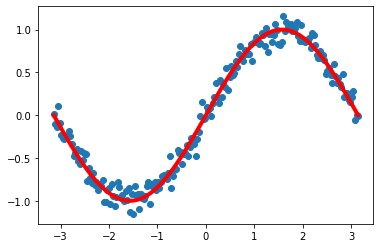

In [4]:
plt.figure()

plt.plot(x, sin_y, c='r', linewidth=4.0)
plt.scatter(x,y) # 가우시안 분포를 따르는 노이즈를 더한 값

plt.show()


### 200개의 sample을 이용해 feature 생성

- ^1 ~ ^4 (1승 ~ 4승)까지 생성

In [5]:
n_feature = 5

phi = np.ones(200).reshape(-1,1)

In [6]:
phi.shape

(200, 1)

- np.power(m, n) : 단일 숫자의 제곱 형태
  - m ** n

In [7]:
for i in range(1, n_feature):
  phi = np.concatenate((phi, np.power(x,i)), axis = 1)
  # 기존 phi(1이 200개 있는것)에 x의 1승부터 4승까지 차례대로 붙여줌

print("The shapeof phi = {}".format(phi.shape))
print("The number of x_data samples: {0} \nthe number of features: {1}".format(phi.shape[0], phi.shape[1]))
print("The number of y_data samples: {}".format(y.shape[0]))

The shapeof phi = (200, 5)
The number of x_data samples: 200 
the number of features: 5
The number of y_data samples: 200


phi = x^0 + x^1 + x^2 + x^3 + x^4

In [8]:
print("x의 1승: \n", np.power(x,1)[:5])
print("x의 2승: \n", np.power(x,2)[:5])
print("x의 3승: \n", np.power(x,3)[:5])
print("x의 4승: \n", np.power(x,4)[:5])

x의 1승: 
 [[-3.14159265]
 [-3.11001886]
 [-3.07844506]
 [-3.04687127]
 [-3.01529747]]
x의 2승: 
 [[9.8696044 ]
 [9.6722173 ]
 [9.476824  ]
 [9.28342452]
 [9.09201884]]
x의 3승: 
 [[-31.00627668]
 [-30.08077819]
 [-29.17388206]
 [-28.28539942]
 [-27.41514142]]
x의 4승: 
 [[97.40909103]
 [93.55178745]
 [89.81019319]
 [86.18197078]
 [82.66480662]]


## Shuffle Data

- train set과 test set이 골고루 분포할 수 있게 shuffle

- np.permutation: array를 복사해서 셔플

In [9]:
np.random.seed(10)

# n은 200이므로 1~200까지의 수를 섞어준다(permutation(n))
idx = np.random.permutation(n)
print("After permutation", idx[:7])

shuffle_x = x[idx]
shuffle_phi = phi[idx]
shuffle_y = y[idx]

print(shuffle_x.shape)
print(shuffle_phi.shape)
print(shuffle_y.shape)

After permutation [ 59   5  20 198  52  19 162]
(200, 1)
(200, 5)
(200, 1)


## Split train and test

In [10]:
# train data 140개
n = 140

x_train = shuffle_x[:n]
phi_train = shuffle_phi[:n]
y_train = shuffle_y[:n]

print(phi_train.shape)

# test data 60개
x_test = shuffle_x[n:]
phi_test = shuffle_phi[n:]
y_test = shuffle_y[n:]

print(phi_test.shape)

(140, 5)
(60, 5)


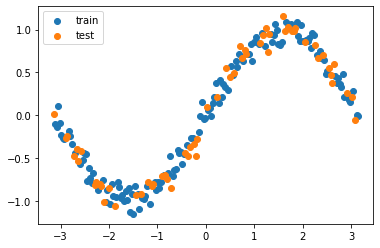

In [11]:
plt.figure()
plt.scatter(x_train, y_train, label = 'train')
plt.scatter(x_test, y_test, label = 'test')
plt.legend()
plt.show()

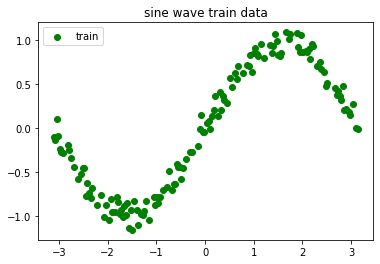

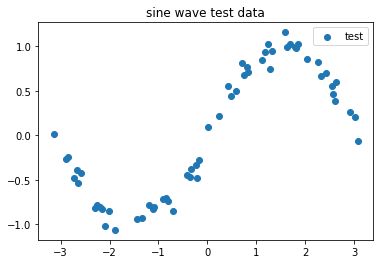

In [12]:
plt.scatter(x_train, y_train, label='train', c='g')
plt.legend()
plt.title('sine wave train data')
plt.show()

plt.scatter(x_test, y_test, label='test')
plt.legend()
plt.title('sine wave test data')
plt.show()

- train set과 test set이 잘 섞인 것을 알 수 있음

# Make data to Tensor

- ts_whole_x = train, test를 포함한 모든 x data의 tensor형

In [13]:
ts_whole_x = torch.tensor(phi, dtype=torch.float)

ts_train_x = torch.tensor(phi_train, dtype=torch.float)
ts_train_y = torch.tensor(y_train, dtype=torch.float)

ts_test_x = torch.tensor(phi_test, dtype=torch.float)
ts_test_y = torch.tensor(y_test, dtype=torch.float)

# ANN architecture

In [16]:
class ANN(nn.Module):
  def __init__(self):
    super(ANN, self).__init__()
    self.fc1 = nn.Linear(5, 64) # input layer
    self.fc2 = nn.Linear(64, 64) # hidden layer 1
    self.fc3 = nn.Linear(64, 64) ## hidden layer 2
    self.fc4 = nn.Linear(64, 64) # hidden layer 3
    self.fc5 = nn.Linear(64, 64) # hidden layer 4
    self.fc6 = nn.Linear(64, 64) # hidden layer 5
    self.fc7 = nn.Linear(64, 16) # hidden layer 6
    self.fc8 = nn.Linear(16, 16) # hidden layer 7
    self.fc9 = nn.Linear(16, 1) # output layer

  def forward(self, x):
    x = F.tanh(self.fc1(x))
    x = F.tanh(self.fc2(x))
    x = F.tanh(self.fc3(x))
    x = F.tanh(self.fc5(x))
    x = F.tanh(self.fc6(x))
    x = F.tanh(self.fc7(x))
    x = F.tanh(self.fc8(x))
    x = torch.tanh(self.fc9(x))

    return x

model = ANN()

In [17]:
# class ANN(nn.Module):
#     def __init__(self):
#         super(ANN, self).__init__()
#         self.fc1 = nn.Linear(5, 64) # input layer
#         self.fc2 = nn.Linear(64, 64) # hidden layer1
#         self.fc3 = nn.Linear(64, 64) # hidden layer2
#         self.fc4 = nn.Linear(64, 64) # hidden layer3
#         self.fc5 = nn.Linear(64, 64) # hidden layer4
#         self.fc6 = nn.Linear(64, 64) # hidden layer5
#         self.fc7 = nn.Linear(64, 16) # hidden layer6
#         self.fc8 = nn.Linear(16, 16) # hidden layer7
#         self.fc9 = nn.Linear(16, 1) # output layer

#     def forward(self, x):
#         x = F.sigmoid(self.fc1(x))
#         x = F.sigmoid(self.fc2(x))
#         x = F.sigmoid(self.fc3(x))
#         x = F.sigmoid(self.fc4(x))
#         x = F.sigmoid(self.fc5(x))
#         x = F.sigmoid(self.fc6(x))
#         x = F.sigmoid(self.fc7(x))
#         x = F.sigmoid(self.fc8(x))
#         x = torch.sigmoid(self.fc9(x))
        
#         return x
    
# model = ANN()

# SGD optimizer로 training

## Loss Function & Optimizer(SGD)

In [19]:
loss_function = nn.MSELoss() # mean squared error
optimizer = optim.SGD(model.parameters(), lr=1e-1)

In [20]:
loss_arr = []
epoch = 100

for num_epoch in range(epoch):

  optimizer.zero_grad()

  prediction = model(ts_train_x)
  loss = loss_function(prediction, ts_train_y) #(예측값, 실제값)

  loss.backward()
  optimizer.step()
  
  loss_arr.append(loss.item())

  if num_epoch % 20 == 0 :
    print("epoch ==> {}\tloss ==> {:.5f}".format(num_epoch, loss))

print("Finish train")

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


epoch ==> 0	loss ==> 0.49781
epoch ==> 20	loss ==> 0.06366
epoch ==> 40	loss ==> 0.02807
epoch ==> 60	loss ==> 0.01298
epoch ==> 80	loss ==> 0.01061
Finish train


## Test Model

In [21]:
with torch.no_grad():
  predicted_test = model(ts_test_x)
  predicted_whole = model(ts_whole_x)
   # we don't need gradients (testing phase)

print("Finish test")

Finish test


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


## Loss 값 확인

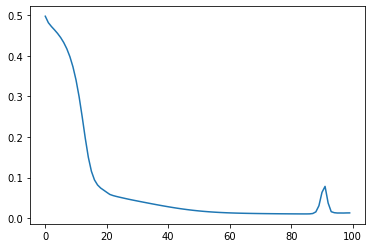

In [22]:
plt.figure()
plt.plot(loss_arr)
plt.show()

## Test data 확인

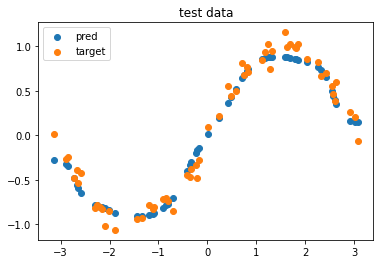

In [24]:
plt.figure()
plt.scatter(x_test, predicted_test, label='pred')
plt.scatter(x_test, y_test, label='target')
plt.legend()
plt.title("test data")
plt.show()

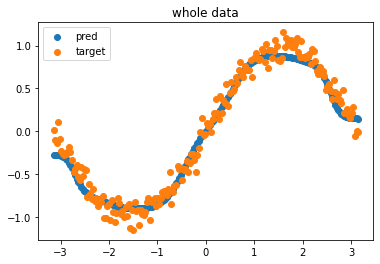

In [25]:
plt.figure()

plt.scatter(x, predicted_whole, label='pred')
plt.scatter(x, y, label='target')

plt.legend()

plt.title('whole data')
plt.show()

# ADAM optimizer

In [26]:
# model 새로 생성
model = ANN()

## Loss Function & Optimizer(Adam)

In [27]:
loss_function = nn.MSELoss() # mean squared error
optimizer = optim.Adam(model.parameters(), lr=1e-2)

## train model-ADAM

In [28]:
loss_arr = []
epoch = 100

for num_epoch in range(epoch):

  optimizer.zero_grad()

  prediction = model(ts_train_x)
  loss = loss_function(prediction, ts_train_y)

  loss.backward()
  optimizer.step()

  loss_arr.append(loss.item())

  if num_epoch % 20 ==0:
    print("epoch ==> {}\tloss ==> {:.5f}".format(num_epoch, loss))

print("Fininsh train")

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


epoch ==> 0	loss ==> 0.52855
epoch ==> 20	loss ==> 0.06213
epoch ==> 40	loss ==> 0.03178
epoch ==> 60	loss ==> 0.00918
epoch ==> 80	loss ==> 0.00782
Fininsh train


## test model

In [29]:
with torch.no_grad():
  predicted_test = model(ts_test_x)
  predicted_whole = model(ts_whole_x)

print("Finish test")

Finish test


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


## Loss 값 확인

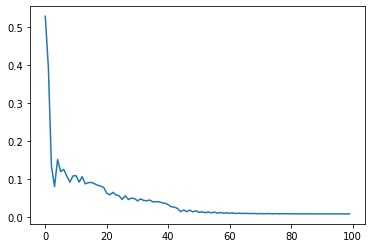

In [30]:
plt.figure()
plt.plot(loss_arr)
plt.show()

## Visualization

In [32]:
y_test_pred = np.array(predicted_test)
y_whole_pred = np.array(predicted_whole)

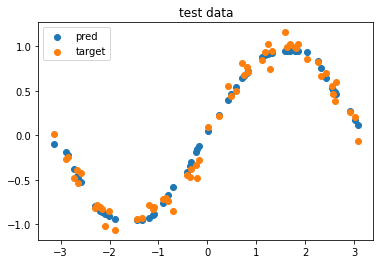

In [33]:
y_test_pred = np.array(predicted_test)
y_whole_pred = np.array(predicted_whole)

plt.figure()
plt.scatter(x_test, y_test_pred, label='pred')
plt.scatter(x_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

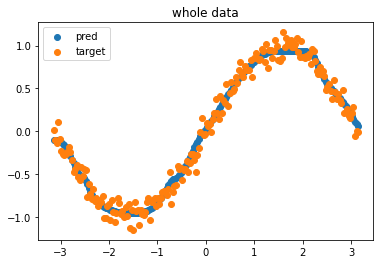

In [34]:
plt.figure()
plt.scatter(x, y_whole_pred, label='pred')
plt.scatter(x, y, label='target')
plt.legend()
plt.title('whole data')
plt.show()

# ADAM의 Learning Rate을 다양하게 바꿔가면서 비교

In [35]:
model = ANN()

In [36]:
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-5)

## train model - ADAM

In [37]:
loss_arr = []

# 100 epoch
for step in range(100):

  optimizer.zero_grad()

  prediction = model(ts_train_x)
  loss = loss_function(prediction, ts_train_y)

  loss.backward()
  optimizer.step()

  loss_arr.append(loss.item())

  if step % 20 ==0:
    print("loss => %.5f"%loss.item())


print("Fininsh train")

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


loss => 0.48267
loss => 0.47864
loss => 0.47456
loss => 0.47037
loss => 0.46597
Fininsh train


## test model

In [38]:
with torch.no_grad():
  predicted_test = model(ts_test_x)
  predicted_whole = model(ts_whole_x)

print("Fininsh test")

Fininsh test


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


## Visualization

In [39]:
y_test_pred = np.array(predicted_test)
y_whole_pred = np.array(predicted_whole)

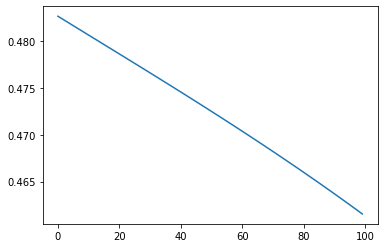

In [40]:
plt.figure()
plt.plot(loss_arr)
plt.show()

- loss 값이 제대로 안 떨어지는 것을 알 수 있음
- 훈련이 잘 안 된 것을 알 수 있음

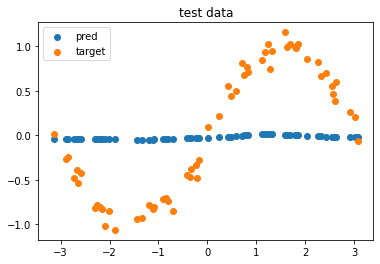

In [41]:
plt.figure()
plt.scatter(x_test, y_test_pred, label='pred')
plt.scatter(x_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

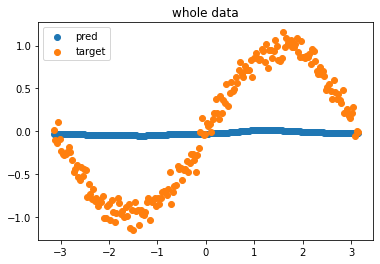

In [42]:
plt.figure()
plt.scatter(x, y_whole_pred, label='pred')
plt.scatter(x, y, label='target')
plt.legend()
plt.title('whole data')
plt.show()

- 예측이 제대로 잘 안 되는 것을 알 수 있음
- model을 생성할 때 learning rate가 중요하다는 것을 알 수 있음